Note for MF:
- Jupyter functions other than notebook
- [kernels](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)
- github tutorial (e.g., [pymc3](https://github.com/pymc-devs/pymc3/blob/master/docs/source/notebooks/GLM-rolling-regression.ipynb)), [gallery](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
- [reveal.js RISE](https://github.com/damianavila/RISE), [Blog](http://www.damian.oquanta.info/)
- [Jupyter nbextensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions)
- [Jupyter Lab](https://github.com/jupyterlab/jupyterlab)

Found it last weekend, quite useful:  
[Reproducible Data Analysis in Jupyter (jakevdp)](https://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/)  
[tool for version control in Jupyter (nbdime)](http://nbdime.readthedocs.io/en/latest/vcs.html) (haven't try it!)

# Why Jupyter is AWESOME?
- As a Document: Help you to share your code and your idea step by step
- Prototyping: Help you to interact and visualize your idea before you move to a more serious text editor
- Presentation: Use reveal.js rise to present your notebook in slides

## Some Jupyter Tricks
Let us follow the post: [28 jupyter tricks](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)

- magic functions: `%`
- bash command: `!`
- interact with R 

In [1]:
# how many magic function we got?
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

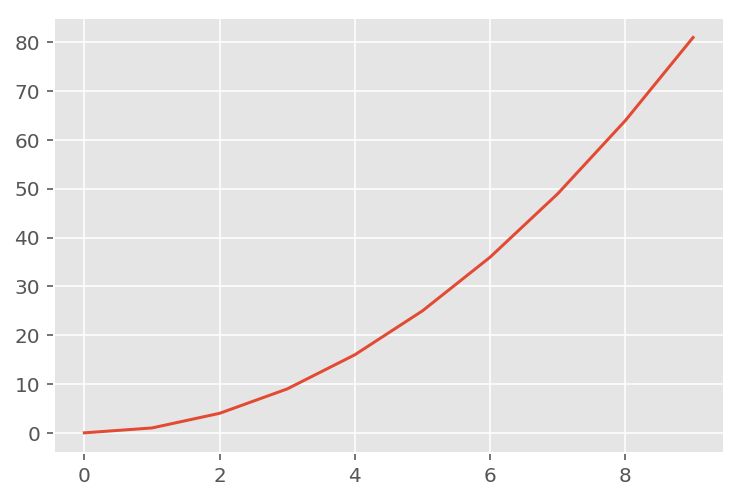

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
%config IPython.matplotlib.backend = 'retina'
%config InlineBackend.figure_format = 'retina'

plt.style.use('ggplot') # seaborn
plt.plot(range(10), [x*x for x in range(10)]);

In [6]:
%%writefile test.py
print('Hello, AstroTalk.')

Writing test.py


In [8]:
%run test.py

Hello, AstroTalk.


In [ ]:
# %load test.py
print('Hello, AstroTalk.')

In [10]:
%pycat test.py

$$
x^2 = a + b +c
$$

In [11]:
%%python2
print 'AstroTalk'

AstroTalk


Cython Magic fast for loop

- [Fast for loop, pyimagesearch](https://www.pyimagesearch.com/2017/08/28/fast-optimized-for-pixel-loops-with-opencv-and-python/)
- [Cython with OpenMP](http://www.perrygeo.com/parallelizing-numpy-array-loops-with-cython-and-mpi.html)

[line profiler](https://github.com/rkern/line_profiler)

COOL things I've never used
- [nbtutor](https://github.com/jorisvandenbossche/nbtutor)
- [pivottablejs](http://nicolas.kruchten.com/content/2015/09/jupyter_pivottablejs/)

In [13]:
%load_ext nbtutor

In [14]:
%%nbtutor -r -f
def AstroTalk(a):
    a += 1
    return a
AstroTalk(2)

In [15]:
from pivottablejs import pivot_ui
import pandas as pd
df = pd.DataFrame({
        'Letter': ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
        'X': [4, 3, 5, 2, 1, 7, 7, 5, 9],
        'Y': [0, 4, 3, 6, 7, 10, 11, 9, 13],
        'Z': [1, 2, 3, 1, 2, 3, 1, 2, 3]
    })

pivot_ui(df)

## Basic `healpy`

**Note for MF**
- `RING` & `NESTED`: Hierarchical Equal Area Iso Latitude pixelation of the sphere
- hack: cartesian projection to Healpix format
    - try to change `nside`
    - try smoothing
    - try different projections
    - try rotation
    - try diff images
- counting objects:
    - generate from Healpix pixels with large `nside` (cheat)
    - counting with `pixfunc`
- something you can play with yourself? (list them:)
- hack: Not so important, but you can use `vpython` for 3D sphere.

In [18]:
from urllib import request

URL = 'http://attach.kmt.org.tw/200910/20091015163058.jpg'

request.urlretrieve(URL, filename='kmt.jpg')

('kmt.jpg', <http.client.HTTPMessage at 0x1197b6e48>)

In [25]:
from PIL import Image
import numpy as np

image = Image.open('kmt.jpg').convert('L')
image = np.array(image)

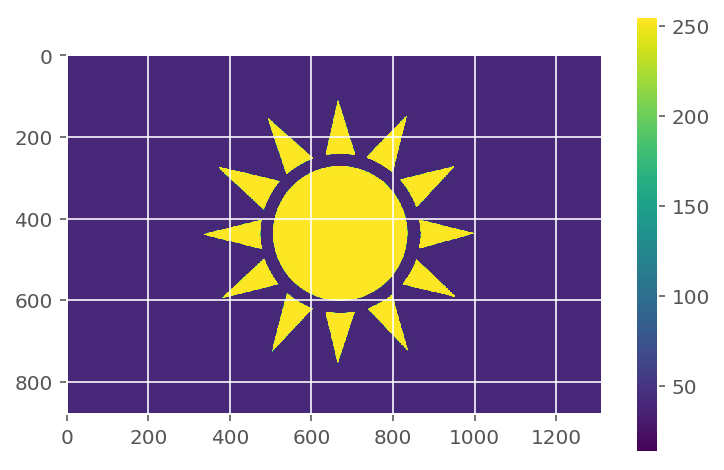

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(image); plt.colorbar();

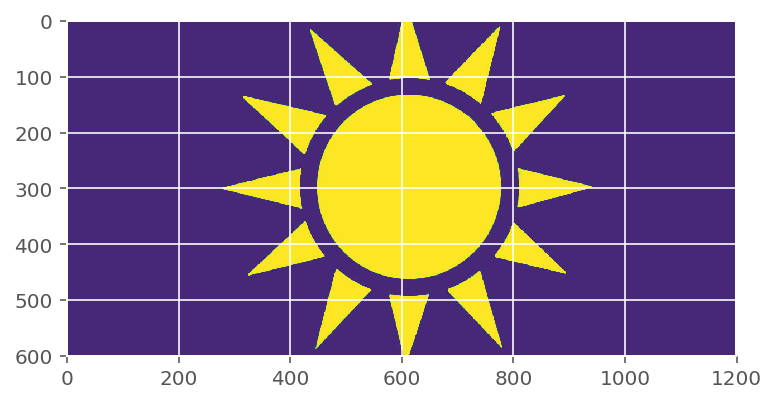

In [31]:
image = image[image.shape[0]//2 - 300:image.shape[0]//2 + 300, 
              image.shape[1]//2 - 600:image.shape[1]//2 + 600]
plt.imshow(image)

In [32]:
import numpy as np
import healpy as hp

def cart_healpix(cartview, nside):
    '''read in a matrix and return a healpix pixelization map'''
    # Generate a blank Healpix map and angular to pixels
    healpix = np.zeros(hp.nside2npix(nside), dtype=np.double)
    hptheta = np.linspace(0, np.pi, num=cartview.shape[0])[:, None]
    hpphi = np.linspace(-np.pi, np.pi, num=cartview.shape[1])
    pix = hp.ang2pix(nside, hptheta, hpphi)
    
    # re-pixelize
    healpix[pix] = cartview
    return healpix

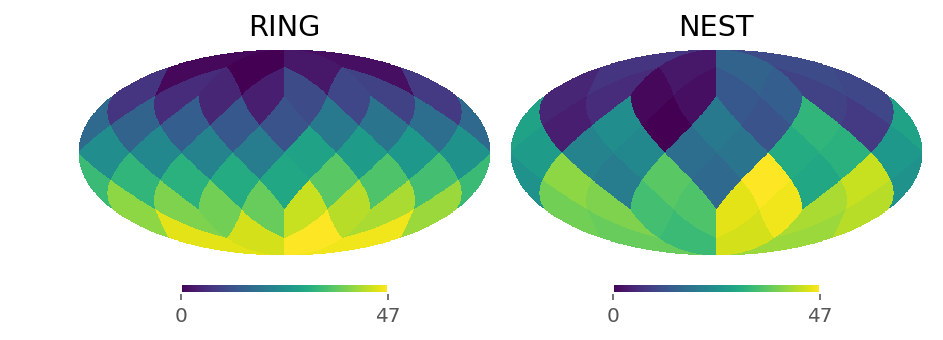

In [45]:
array = np.arange(hp.nside2npix(2))
hp.mollview(array, nest=False, sub=(1,2,1), title='RING')
hp.mollview(array, nest=True,  sub=(1,2,2), title='NEST')

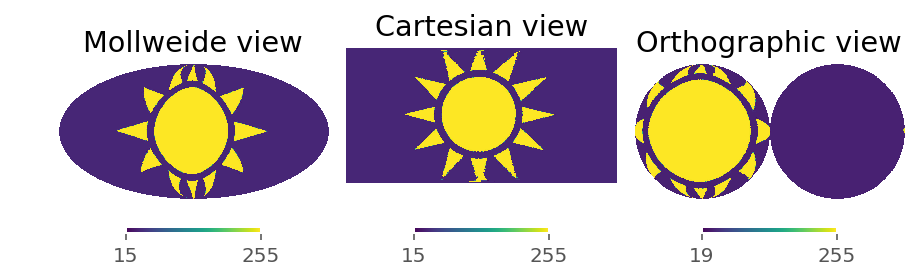

In [46]:
# cartview -> healpix
healpix = cart_healpix(image, 128)
hp.mollview(healpix, sub=(1,3,1))
hp.cartview(healpix, sub=(1,3,2))
hp.orthview(healpix, sub=(1,3,3))

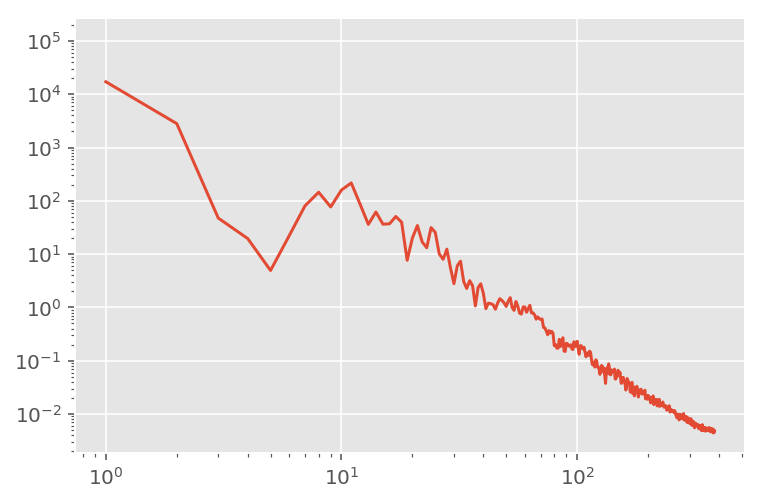

In [49]:
cl  = hp.anafast(healpix)
ell = np.arange(len(cl))
plt.loglog(ell, cl);

In [61]:
nside = 1
cartview = np.arange(200).reshape(10, 20)
# Generate a blank Healpix map and angular to pixels
healpix = np.zeros(hp.nside2npix(nside), dtype=np.double)


hptheta = np.linspace(0, np.pi, num=cartview.shape[0])[:, None]
hpphi   = np.linspace(-np.pi, np.pi, num=cartview.shape[1])
pix = hp.ang2pix(nside, hptheta, hpphi)


In [64]:
pix

array([[ 2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  0,  0,  0,  0,  0,  1,  1,
         1,  1,  2],
       [ 2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  0,  0,  0,  0,  0,  1,  1,
         1,  1,  2],
       [ 2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  0,  0,  0,  0,  0,  1,  1,
         1,  1,  2],
       [ 6,  2,  2,  2,  2,  7,  3,  3,  3,  4,  4,  0,  0,  0,  5,  1,  1,
         1,  1,  6],
       [ 6,  6,  2,  7,  7,  7,  7,  3,  4,  4,  4,  4,  0,  5,  5,  5,  5,
         1,  6,  6],
       [ 6,  6, 10,  7,  7,  7,  7, 11,  4,  4,  4,  4,  8,  5,  5,  5,  5,
         9,  6,  6],
       [ 6, 10, 10, 10, 10,  7, 11, 11, 11,  4,  4,  8,  8,  8,  5,  9,  9,
         9,  9,  6],
       [10, 10, 10, 10, 10, 11, 11, 11, 11, 11,  8,  8,  8,  8,  8,  9,  9,
         9,  9, 10],
       [10, 10, 10, 10, 10, 11, 11, 11, 11, 11,  8,  8,  8,  8,  8,  9,  9,
         9,  9, 10],
       [10, 10, 10, 10, 10, 11, 11, 11, 11, 11,  8,  8,  8,  8,  8,  9,  9,
         9,  9, 10]])

In [63]:
cartview

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
         33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139],
       [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159],
       [160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 1

In [65]:
# re-pixelize
healpix[pix] = cartview

In [66]:
healpix

array([  92.,   97.,   82.,   87.,  130.,  134.,  139.,  125.,  194.,
        198.,  199.,  189.])

In [ ]:
# Try yourself with your own image!